# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Sandy Tirta Yudha]
- **Email:** [sandyytirtaa@gmail.com]
- **ID Dicoding:** [sandyytirtaa]

## Menentukan Pertanyaan Bisnis

- Berapa banyak distribusi Jumlah Sewa Sepeda?
- Apa saja tren Musiman dalam Sewa Sepeda?
- Perbandingan Pengguna Casual dan Registered

## Import Semua Packages/Library yang Digunakan

In [460]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from google.colab import files

## Data Wrangling

### Gathering Data

In [461]:
day_df = pd.read_csv("https://raw.githubusercontent.com/sendy-ty/Submission-/refs/heads/main/dataset/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [462]:
hour_df = pd.read_csv("https://raw.githubusercontent.com/sendy-ty/Submission-/refs/heads/main/dataset/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

Menilai tabel day_df

In [463]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [464]:
day_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [465]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


In [466]:
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


Menilai tabel hour_df

In [467]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [468]:
hour_df.nunique()

,0
instant,17379
dteday,731
season,4
yr,2
mnth,12
hr,24
holiday,2
weekday,7
workingday,2
weathersit,4


In [469]:
print("Jumlah duplikasi: ",hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [470]:
hour_df.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


### Cleaning Data

Membersihkan tabel day_df

In [471]:
day_df.drop(labels='instant', axis=1, inplace=True)
hour_df.drop(labels='instant', axis=1, inplace=True)

In [472]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      731 non-null    object 
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(10), object(1)
memory usage: 85.8+ KB


In [473]:
day_df.duplicated().sum()

0

Merubah tipe data

In [474]:
# Mengubah nama beberapa kolom dalam DataFrame day_df & hour_df
day_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "hum": "humidity",
        "cnt": "count",
    },
    inplace=True,
)
hour_df.rename(
    columns={
        "dteday": "dateday",
        "yr": "year",
        "mnth": "month",
        "hr": "hour",
        "hum": "humidity",
        "cnt": "count",
    },
    inplace=True,
)

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [475]:
day_df["dateday"] = pd.to_datetime(day_df["dateday"])
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])
day_df["year"] = day_df["dateday"].dt.year
hour_df["year"] = hour_df["dateday"].dt.year
day_df["month"] = day_df["dateday"].dt.strftime("%B")
hour_df["month"] = hour_df["dateday"].dt.strftime("%B")
weather_mapping = {
    1: "cerah/berawan",
    2: "berawan dan berkabut",
    3: "hujan/salju ringan",
    4: "hujan/salju lebat",
}
day_df["weathersit"] = day_df["weathersit"].replace(weather_mapping)
hour_df["weathersit"] = hour_df["weathersit"].replace(weather_mapping)

hour_df.head()

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01,1,2011,January,0,0,6,0,cerah/berawan,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,2011,January,1,0,6,0,cerah/berawan,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,2011,January,2,0,6,0,cerah/berawan,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,2011,January,3,0,6,0,cerah/berawan,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,2011,January,4,0,6,0,cerah/berawan,0.24,0.2879,0.75,0.0,0,1,1


In [476]:
all_df = hour_df.merge(
    day_df, on="dateday", how="inner", suffixes=("_hour", "_day")
)
all_df.head()

,dateday,season_hour,year_hour,month_hour,hour,holiday_hour,weekday_hour,workingday_hour,weathersit_hour,temp_hour,...,weekday_day,workingday_day,weathersit_day,temp_day,atemp_day,humidity_day,windspeed_day,casual_day,registered_day,count_day
0,2011-01-01,1,2011,January,0,0,6,0,cerah/berawan,0.24,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-01,1,2011,January,1,0,6,0,cerah/berawan,0.22,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
2,2011-01-01,1,2011,January,2,0,6,0,cerah/berawan,0.22,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
3,2011-01-01,1,2011,January,3,0,6,0,cerah/berawan,0.24,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985
4,2011-01-01,1,2011,January,4,0,6,0,cerah/berawan,0.24,...,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985


In [477]:
day_df.drop_duplicates(inplace=True)

In [478]:
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


Missing Value

In [479]:
day_df.isna().sum()

,0
dateday,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


In [480]:
day_df.season.value_counts()

,count
season,
3,188
2,184
1,181
4,178


In [481]:
day_df.fillna(value="Prefer not to say", inplace=True)

In [482]:
day_df.fillna(1, inplace=True)

In [483]:
day_df.isna().sum()

,0
dateday,0
season,0
year,0
month,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0
atemp,0


Inaccurate value

In [484]:
day_df.describe()

,dateday,season,year,holiday,weekday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,2011.500684,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,2011.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,2012.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,NaN,1.110807,0.500342,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [485]:
day_df[day_df["count"] == day_df["count"].max()]

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
623,2012-09-15,3,2012,September,0,6,0,cerah/berawan,0.608333,0.585867,0.501667,0.247521,3160,5554,8714


In [486]:
day_df["count"].replace(day_df["count"].max(), 70, inplace=True)

<ipython-input-486-a66c269bb9c0>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  day_df["count"].replace(day_df["count"].max(), 70, inplace=True)


In [487]:
day_df.describe()

,dateday,season,year,holiday,weekday,workingday,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,2012-01-01 00:00:00,2.496580,2011.500684,0.028728,2.997264,0.683995,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4492.523940
min,2011-01-01 00:00:00,1.000000,2011.000000,0.000000,0.000000,0.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,0.000000,1.000000,0.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3135.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,0.000000,3.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4541.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,0.000000,5.000000,1.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5929.500000
max,2012-12-31 00:00:00,4.000000,2012.000000,1.000000,6.000000,1.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8555.000000
std,NaN,1.110807,0.500342,0.167155,2.004787,0.465233,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.861929


Membersihkan tabel hour_df

In [488]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     17379 non-null  datetime64[ns]
 1   season      17379 non-null  int64         
 2   year        17379 non-null  int32         
 3   month       17379 non-null  object        
 4   hour        17379 non-null  int64         
 5   holiday     17379 non-null  int64         
 6   weekday     17379 non-null  int64         
 7   workingday  17379 non-null  int64         
 8   weathersit  17379 non-null  object        
 9   temp        17379 non-null  float64       
 10  atemp       17379 non-null  float64       
 11  humidity    17379 non-null  float64       
 12  windspeed   17379 non-null  float64       
 13  casual      17379 non-null  int64         
 14  registered  17379 non-null  int64         
 15  count       17379 non-null  int64         
dtypes: datetime64[ns](1), 

In [489]:
hour_df.columns

Index(['dateday', 'season', 'year', 'month', 'hour', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'humidity', 'windspeed',
       'casual', 'registered', 'count'],
      dtype='object')

In [490]:
category_columns = ["season", "weather"]

for column in category_columns:
    if column in hour_df.columns:
        hour_df[column] = hour_df[column].astype("category")
    else:
        print(f"Kolom '{column}' tidak ditemukan dalam DataFrame.")

hour_df.dtypes

Kolom 'weather' tidak ditemukan dalam DataFrame.


,0
dateday,datetime64[ns]
season,category
year,int32
month,object
hour,int64
holiday,int64
weekday,int64
workingday,int64
weathersit,object
temp,float64


In [491]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dateday     731 non-null    datetime64[ns]
 1   season      731 non-null    int64         
 2   year        731 non-null    int32         
 3   month       731 non-null    object        
 4   holiday     731 non-null    int64         
 5   weekday     731 non-null    int64         
 6   workingday  731 non-null    int64         
 7   weathersit  731 non-null    object        
 8   temp        731 non-null    float64       
 9   atemp       731 non-null    float64       
 10  humidity    731 non-null    float64       
 11  windspeed   731 non-null    float64       
 12  casual      731 non-null    int64         
 13  registered  731 non-null    int64         
 14  count       731 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(7), object(2)
memory usa

## Exploratory Data Analysis (EDA)

### Explore ...

In [492]:
day_df.sample(5)

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
592,2012-08-15,3,2012,August,0,3,1,cerah/berawan,0.706667,0.654037,0.619583,0.169771,1198,6149,7347
171,2011-06-21,3,2011,June,0,2,1,berawan dan berkabut,0.680833,0.637646,0.770417,0.171025,774,4061,4835
371,2012-01-07,1,2012,January,0,6,0,cerah/berawan,0.393333,0.390779,0.531667,0.174758,1070,3451,4521
142,2011-05-23,2,2011,May,0,1,1,berawan dan berkabut,0.631667,0.590296,0.810000,0.233842,836,3438,4274
302,2011-10-30,4,2011,October,0,0,0,cerah/berawan,0.319167,0.321329,0.623750,0.176617,885,2446,3331


In [493]:
day_df.describe(include="all")

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
count,731,731.000000,731.000000,731,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,12,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,January,NaN,NaN,NaN,cerah/berawan,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,62,NaN,NaN,NaN,463,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,2.496580,2011.500684,NaN,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4492.523940
min,2011-01-01 00:00:00,1.000000,2011.000000,NaN,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,NaN,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3135.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,NaN,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4541.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,NaN,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5929.500000
max,2012-12-31 00:00:00,4.000000,2012.000000,NaN,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8555.000000


In [494]:
day_df["dateday"].is_unique

True

In [495]:
day_df[day_df.duplicated(subset=["dateday"], keep=False)]

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count


In [496]:
day_df.groupby(by="year").agg({
    "count": ["max", "min", "mean", "std"]
})

count                               
       max  min         mean          std
year                                     
2011  6043  431  3405.761644  1378.753666
2012  8555   22  5576.316940  1804.435229

In [497]:
day_df.groupby(by="month")["dateday"].nunique().sort_values(ascending=False)

,dateday
month,
August,62
December,62
January,62
July,62
March,62
May,62
October,62
April,60
June,60


In [498]:
day_df.groupby(by="year")["dateday"].nunique().sort_values(ascending=False)


,dateday
year,
2012,366
2011,365


**Explorer hour_df**

In [499]:
hour_df.sample(5)

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count
16675,2012-12-02,4,2012,December,14,0,0,0,cerah/berawan,0.44,0.4394,0.62,0.2537,142,331,473
11345,2012-04-22,2,2012,April,22,0,0,0,hujan/salju ringan,0.34,0.2879,0.87,0.5224,0,13,13
3164,2011-05-16,2,2011,May,18,0,1,1,hujan/salju ringan,0.58,0.5455,0.83,0.1940,55,398,453
9242,2012-01-26,1,2012,January,0,0,4,1,berawan dan berkabut,0.28,0.2879,0.75,0.1045,3,22,25
14319,2012-08-24,3,2012,August,20,0,5,1,berawan dan berkabut,0.70,0.6515,0.65,0.2239,66,297,363


In [500]:
hour_df["dateday"] = pd.to_datetime(hour_df["dateday"])
hour_df["delivery_time"] = hour_df["dateday"].diff().dt.total_seconds() / 86400
hour_df["delivery_time"] = hour_df["delivery_time"].fillna(0).astype(int)

hour_df.sample(5)

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,delivery_time
2655,2011-04-25,2,2011,April,13,0,1,1,cerah/berawan,0.70,0.6515,0.65,0.2239,57,146,203,0
1663,2011-03-14,1,2011,March,21,0,1,1,cerah/berawan,0.34,0.3333,0.46,0.1343,5,58,63,0
2411,2011-04-15,2,2011,April,9,1,5,0,cerah/berawan,0.50,0.4848,0.55,0.1940,16,162,178,0
1932,2011-03-26,2,2011,March,7,0,6,0,cerah/berawan,0.20,0.1970,0.51,0.1940,18,23,41,0
7211,2011-11-02,4,2011,November,2,0,3,1,cerah/berawan,0.30,0.3333,0.87,0.0000,0,2,2,0


In [501]:
hour_df.sample(5)

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,delivery_time
6933,2011-10-21,4,2011,October,12,0,5,1,cerah/berawan,0.50,0.4848,0.45,0.2985,47,193,240,0
16099,2012-11-08,4,2012,November,13,0,4,1,cerah/berawan,0.44,0.4394,0.18,0.4179,33,195,228,0
17011,2012-12-16,4,2012,December,14,0,0,0,berawan dan berkabut,0.38,0.3939,0.76,0.1343,50,260,310,0
9308,2012-01-28,1,2012,January,18,0,6,0,cerah/berawan,0.42,0.4242,0.41,0.2239,40,201,241,0
17276,2012-12-27,1,2012,December,17,0,4,1,berawan dan berkabut,0.26,0.2424,0.52,0.2836,30,227,257,0


In [502]:
hour_df.describe(include="all")

,dateday,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,delivery_time
count,17379,17379.0,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,4.0,NaN,12,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,3.0,NaN,May,NaN,NaN,NaN,NaN,cerah/berawan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4496.0,NaN,1488,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,NaN,2011.502561,NaN,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088,0.042005
min,2011-01-01 00:00:00,NaN,2011.000000,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,2011-07-04 00:00:00,NaN,2011.000000,NaN,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000,0.000000
50%,2012-01-02 00:00:00,NaN,2012.000000,NaN,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000,0.000000
75%,2012-07-02 00:00:00,NaN,2012.000000,NaN,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000,0.000000
max,2012-12-31 00:00:00,NaN,2012.000000,NaN,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000,1.000000


In [503]:
instant_in_hour_df = set(hour_df.get("instant", []))
day_df["status"] = day_df.get("instant", pd.Series()).isin(instant_in_hour_df).map({True: "Active", False: "Non Active"})

Explore day_df & hour_df

Total Casual Users: 620017
Total Registered Users: 2672662


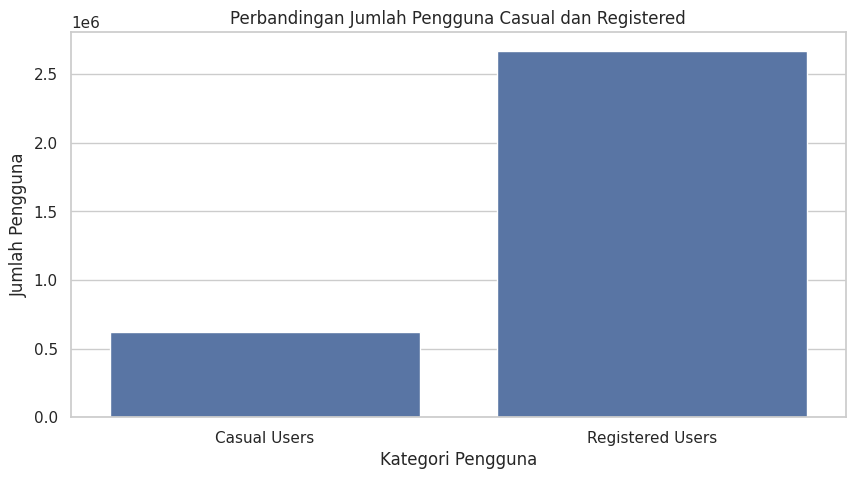

In [504]:
# Menghitung total pengguna casual dan registered
total_casual = hour_df['casual'].sum()
total_registered = hour_df['registered'].sum()

print(f"Total Casual Users: {total_casual}")
print(f"Total Registered Users: {total_registered}")

plt.figure(figsize=(10, 5))
sns.barplot(x=["Casual Users", "Registered Users"], y=[total_casual, total_registered])
plt.xlabel("Kategori Pengguna")
plt.ylabel("Jumlah Pengguna")
plt.title("Perbandingan Jumlah Pengguna Casual dan Registered")
plt.show()

In [505]:
df = day_df.copy()

**ANALISIS BERDASARKAN MUSIM**

In [506]:
# Total jumlah pengguna berdasarkan musim
seasonal_usage = hour_df.groupby('season').agg({
    "casual": "sum",
    "registered": "sum",
    "count": "sum"
}).reset_index()

seasonal_usage

<ipython-input-506-1d33437800be>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_usage = hour_df.groupby('season').agg({


,season,casual,registered,count
0,1,60622,410726,471348
1,2,203522,715067,918589
2,3,226091,835038,1061129
3,4,129782,711831,841613


<ipython-input-507-96b78a624293>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='count', data=hour_df, palette="Set2")


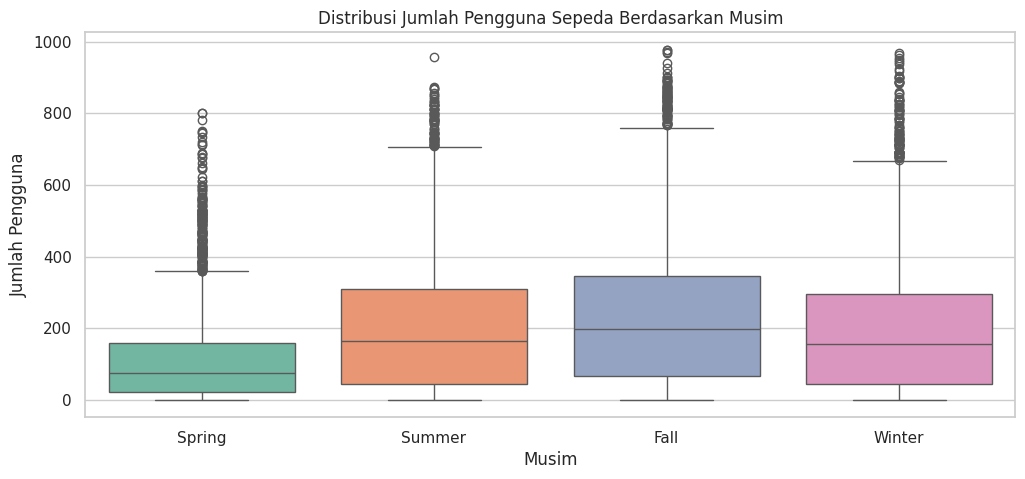

In [507]:
plt.figure(figsize=(12, 5))
sns.boxplot(x='season', y='count', data=hour_df, palette="Set2")
plt.xlabel("Musim")
plt.ylabel("Jumlah Pengguna")
plt.title("Distribusi Jumlah Pengguna Sepeda Berdasarkan Musim")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.show()

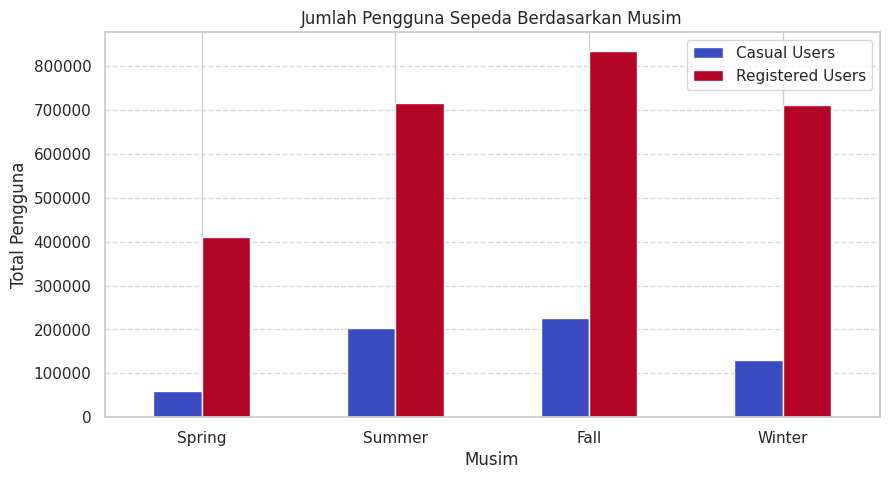

In [508]:
seasonal_usage.set_index("season")[["casual", "registered"]].plot(kind="bar", figsize=(10,5), colormap="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Total Pengguna")
plt.title("Jumlah Pengguna Sepeda Berdasarkan Musim")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Spring", "Summer", "Fall", "Winter"], rotation=0)
plt.legend(["Casual Users", "Registered Users"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**ANALISIS BERDASARKAN BULAN**

Mengelompokkan total penggunaan sepeda berdasarkan bulan

In [509]:
monthly_usage = hour_df.groupby("month")[["casual", "registered", "count"]].sum().reset_index()

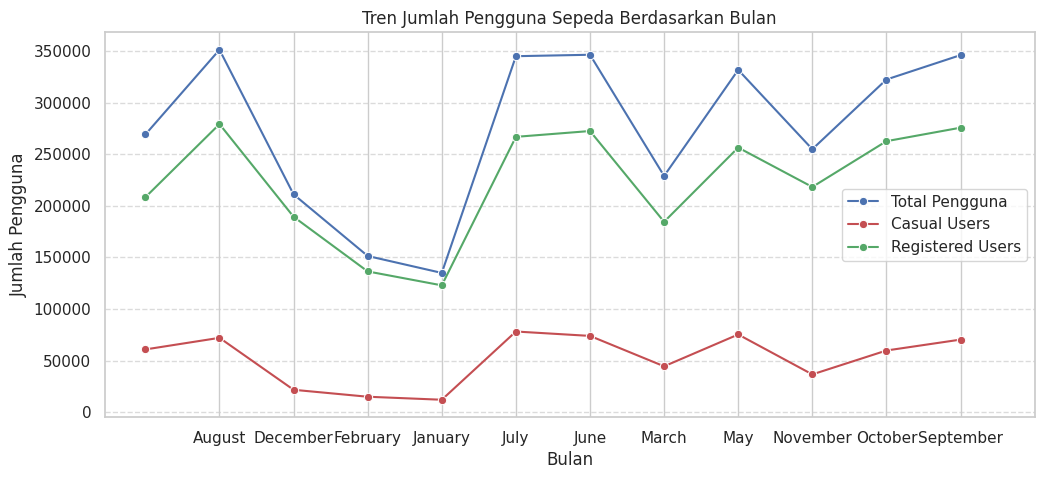

In [510]:
plt.figure(figsize=(12, 5))
sns.lineplot(x="month", y="count", data=monthly_usage, marker="o", color="b", label="Total Pengguna")
sns.lineplot(x="month", y="casual", data=monthly_usage, marker="o", color="r", label="Casual Users")
sns.lineplot(x="month", y="registered", data=monthly_usage, marker="o", color="g", label="Registered Users")
plt.xlabel("Bulan")
plt.ylabel("Jumlah Pengguna")
plt.title("Tren Jumlah Pengguna Sepeda Berdasarkan Bulan")
plt.xticks(range(1, 13))
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

**ANALISIS BERDASARKAN CUACA**

Mengelompokkan jumlah pengguna berdasarkan kondisi cuaca

In [511]:
weather_usage = hour_df.groupby("weathersit")[["casual", "registered", "count"]].sum().reset_index()

<ipython-input-512-786cfaa53825>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="count", data=weather_usage, palette="rocket")


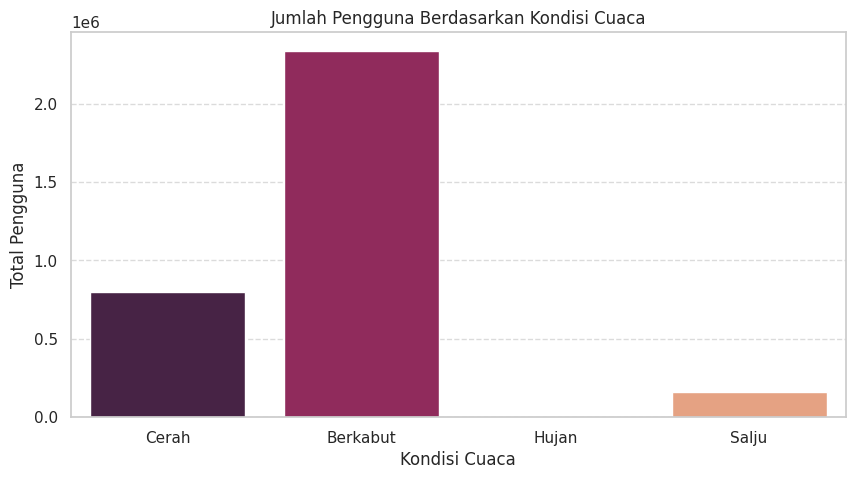

In [512]:
plt.figure(figsize=(10,5))
sns.barplot(x="weathersit", y="count", data=weather_usage, palette="rocket")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Pengguna")
plt.title("Jumlah Pengguna Berdasarkan Kondisi Cuaca")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berkabut", "Hujan", "Salju"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

Membandingkan pengguna casual vs registered berdasarkan kondisi cuaca

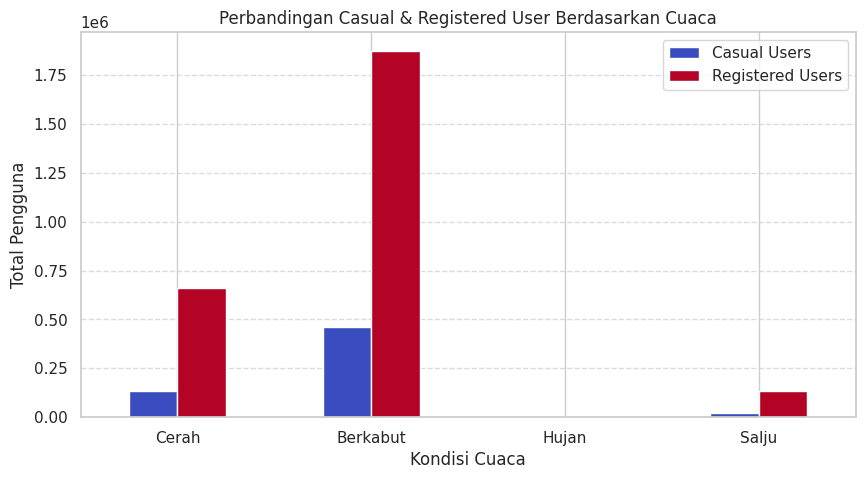

In [513]:
weather_usage.set_index("weathersit")[["casual", "registered"]].plot(kind="bar", figsize=(10,5), colormap="coolwarm")
plt.xlabel("Kondisi Cuaca")
plt.ylabel("Total Pengguna")
plt.title("Perbandingan Casual & Registered User Berdasarkan Cuaca")
plt.xticks(ticks=[0, 1, 2, 3], labels=["Cerah", "Berkabut", "Hujan", "Salju"], rotation=0)
plt.legend(["Casual Users", "Registered Users"])
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1: Berapa banyak distribusi Jumlah Sewa Sepeda?

 Grafik ini juga membantu mengidentifikasi outlier (hari dengan jumlah sewa yang sangat tinggi atau rendah).

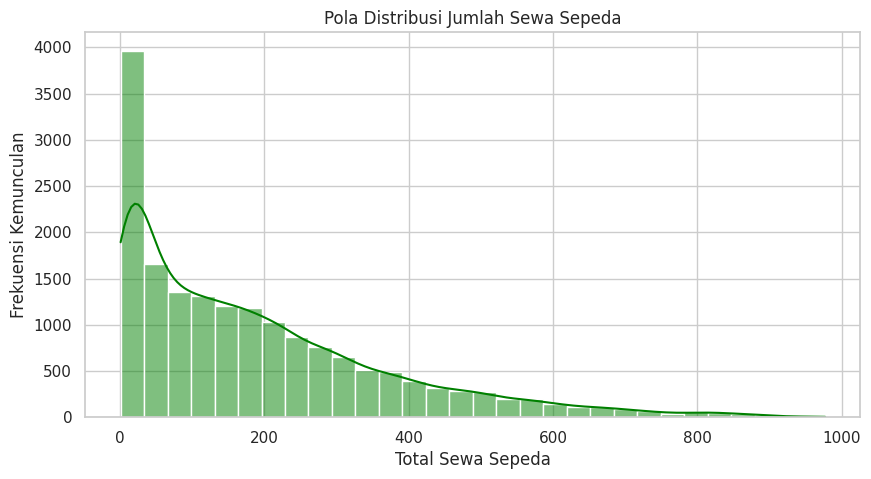

In [514]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,5))
sns.histplot(hour_df["count"], bins=30, kde=True, color="green")
plt.xlabel("Total Sewa Sepeda")
plt.ylabel("Frekuensi Kemunculan")
plt.title("Pola Distribusi Jumlah Sewa Sepeda")
plt.show()

In [515]:
day_df.head()

,dateday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,status
0,2011-01-01,1,2011,January,0,6,0,berawan dan berkabut,0.344167,0.363625,0.805833,0.160446,331,654,985,NaN
1,2011-01-02,1,2011,January,0,0,0,berawan dan berkabut,0.363478,0.353739,0.696087,0.248539,131,670,801,NaN
2,2011-01-03,1,2011,January,0,1,1,cerah/berawan,0.196364,0.189405,0.437273,0.248309,120,1229,1349,NaN
3,2011-01-04,1,2011,January,0,2,1,cerah/berawan,0.200000,0.212122,0.590435,0.160296,108,1454,1562,NaN
4,2011-01-05,1,2011,January,0,3,1,cerah/berawan,0.226957,0.229270,0.436957,0.186900,82,1518,1600,NaN


### Pertanyaan 2: Apa saja tren Musiman dalam Sewa Sepeda?

Dari Grafik dibawah, kita bisa melihat bagaimana faktor musim memengaruhi penggunaan sepeda.

<ipython-input-516-ac633b1c1eb7>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tren_musim = hour_df.groupby("season")["count"].sum().reset_index()
<ipython-input-516-ac633b1c1eb7>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="season", y="count", data=tren_musim, palette="coolwarm")


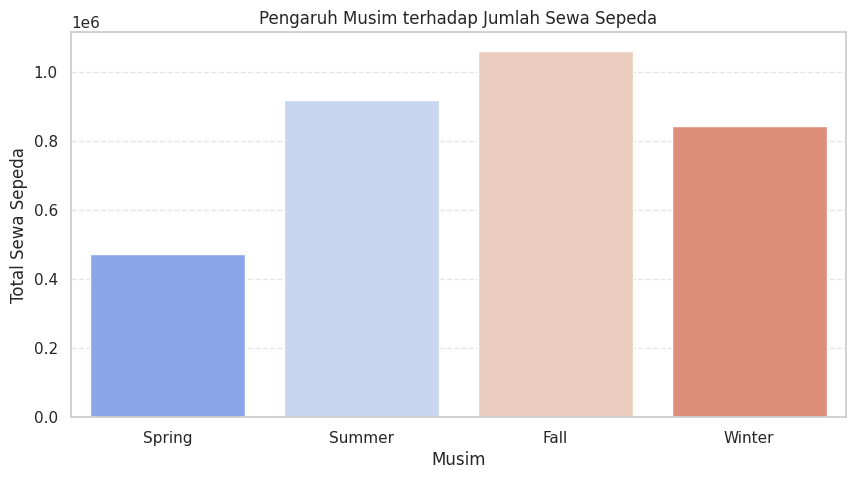

In [516]:
tren_musim = hour_df.groupby("season")["count"].sum().reset_index()
plt.figure(figsize=(10,5))
sns.barplot(x="season", y="count", data=tren_musim, palette="coolwarm")
plt.xlabel("Musim")
plt.ylabel("Total Sewa Sepeda")
plt.title("Pengaruh Musim terhadap Jumlah Sewa Sepeda")
plt.xticks(ticks=[0,1,2,3], labels=["Spring", "Summer", "Fall", "Winter"])
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### Pertanyaan 3: Perbandingan Pengguna Casual dan Registered

Grafik dibawah menunjukkan perbedaan jumlah antara pengguna Casual dan Registered

<ipython-input-517-679c283fc42e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Tipe Pengguna", y="Jumlah", data=total_pengguna, palette="magma")


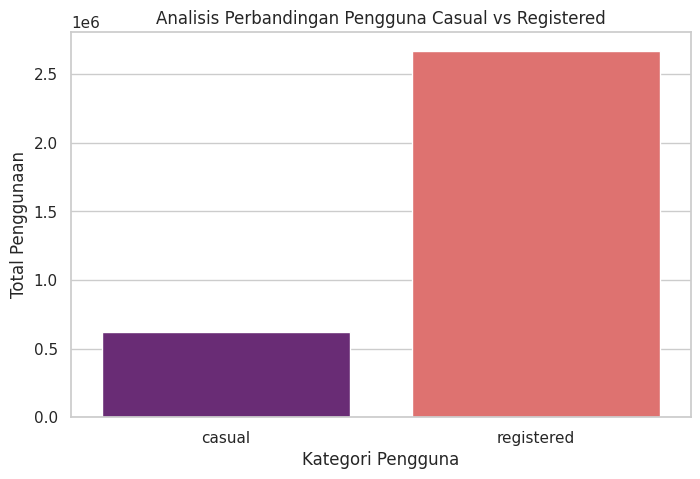

In [517]:
# total pengguna casual dan registered
total_pengguna = hour_df[["casual", "registered"]].sum().reset_index()
total_pengguna.columns = ["Tipe Pengguna", "Jumlah"]

plt.figure(figsize=(8,5))
sns.barplot(x="Tipe Pengguna", y="Jumlah", data=total_pengguna, palette="magma")
plt.xlabel("Kategori Pengguna")
plt.ylabel("Total Penggunaan")
plt.title("Analisis Perbandingan Pengguna Casual vs Registered")
plt.show()

## **Analisis RFM pada Dataset Bike Sharing**

*   Recency : Seberapa lama sejak pengguna terakhir menyewa sepeda.
*   Frequency : Seberapa sering pengguna menyewa sepeda.
*   Monetary : Total jumlah sepeda yang disewa oleh pengguna registered.


In [518]:
#Memastikan kolom yang diperlukan terdapat pada dataset
required_columns = {"registered", "dateday", "count"}
if not required_columns.issubset(day_df.columns):
    raise KeyError("Dataset harus memiliki kolom 'registered', 'dateday', dan 'count'!")

day_df["dateday"] = pd.to_datetime(day_df["dateday"])
reference_date = day_df["dateday"].max() + dt.timedelta(days=1)

rfm_data = day_df.groupby("registered").agg({
    "dateday": lambda x: (reference_date - x.max()).days,  # Recency
    "count": ["count", "sum"]  # Frequency & Monetary
}).reset_index()

rfm_data.columns = ["registered", "Recency", "Frequency", "Monetary"]
rfm_data.head()

,registered,Recency,Frequency,Monetary
0,20,64,1,22
1,416,705,1,431
2,432,6,1,441
3,451,373,1,754
4,472,706,1,506


In [519]:
required_columns = {"registered", "dateday", "count"}
if not required_columns.issubset(day_df.columns):
    raise KeyError("Dataset harus memiliki kolom 'registered', 'dateday', dan 'count'!")

day_df["dateday"] = pd.to_datetime(day_df["dateday"])
reference_date = day_df["dateday"].max() + dt.timedelta(days=1)

rfm_data = day_df.groupby("registered").agg({
    "dateday": lambda x: (reference_date - x.max()).days,
    "count": ["count", "sum"]
}).reset_index()

rfm_data.columns = ["registered", "Recency", "Frequency", "Monetary"]
rfm_data["R_Score"] = pd.qcut(rfm_data["Recency"], q=5, labels=[5, 4, 3, 2, 1])
rfm_data["F_Score"] = pd.qcut(rfm_data["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])
rfm_data["M_Score"] = pd.qcut(rfm_data["Monetary"], q=5, labels=[1, 2, 3, 4, 5])
rfm_data["RFM_Score"] = rfm_data["R_Score"].astype(str) + rfm_data["F_Score"].astype(str) + rfm_data["M_Score"].astype(str)

In [520]:
rfm_data[["Recency", "Frequency", "Monetary"]].describe()

,Recency,Frequency,Monetary
count,679.000000,679.000000,679.000000
mean,360.539028,1.076583,4836.575847
std,212.183961,0.282262,2534.648442
min,1.000000,1.000000,22.000000
25%,173.500000,1.000000,3192.000000
50%,359.000000,1.000000,4592.000000
75%,543.000000,1.000000,6395.000000
max,731.000000,3.000000,22373.000000


In [521]:
rfm_data[["R_Score", "F_Score", "M_Score"]].describe()

,R_Score,F_Score,M_Score
count,679,679,679
unique,5,5,5
top,5,1,1
freq,136,136,136


In [522]:
rfm_data.sort_values(by="Recency", ascending=True).head(5)

,registered,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
145,2290,1,1,2729,5,2,2,522
58,1432,2,1,1796,5,1,1,511
36,1182,3,1,1341,5,1,1,511
163,2451,4,1,3095,5,2,2,522
111,1867,5,1,2114,5,1,1,511


In [523]:
rfm_data.sort_values(by="Frequency", ascending=True).head(5)

,registered,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,20,64,1,22,5,1,1,511
440,4164,567,1,4891,2,4,3,243
441,4169,600,1,4864,1,4,3,143
442,4176,329,1,4375,3,4,3,343
443,4181,496,1,5130,2,4,4,244


In [524]:
rfm_data.sort_values(by="Monetary", ascending=True).head(5)

,registered,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,20,64,1,22,5,1,1,511
582,5554,108,1,70,5,4,1,541
1,416,705,1,431,1,1,1,111
2,432,6,1,441,5,1,1,511
4,472,706,1,506,1,1,1,111


In [525]:
rfm_data.head()

,registered,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score
0,20,64,1,22,5,1,1,511
1,416,705,1,431,1,1,1,111
2,432,6,1,441,5,1,1,511
3,451,373,1,754,3,1,1,311
4,472,706,1,506,1,1,1,111


**Visualisasi RFM Metrics**

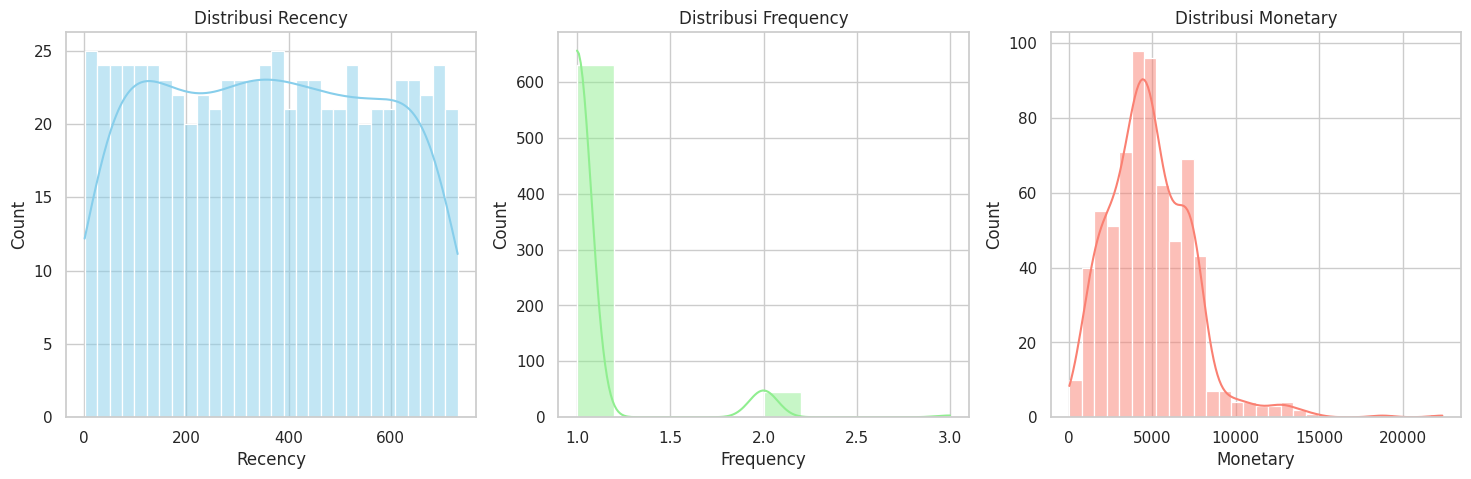

In [526]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm_data["Recency"], bins=30, kde=True, ax=axes[0], color="skyblue")
axes[0].set_title("Distribusi Recency")
sns.histplot(rfm_data["Frequency"], bins=10, kde=True, ax=axes[1], color="lightgreen")
axes[1].set_title("Distribusi Frequency")
sns.histplot(rfm_data["Monetary"], bins=30, kde=True, ax=axes[2], color="salmon")
axes[2].set_title("Distribusi Monetary")

plt.show()

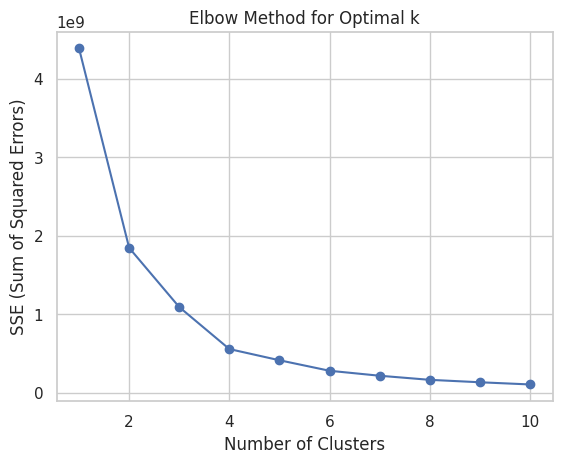

In [527]:
# Menentukan jumlah cluster optimal dengan metode Elbow
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_data[["Recency", "Frequency", "Monetary"]])
    sse.append(kmeans.inertia_)

# Plot Elbow Method
plt.plot(range(1, 11), sse, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("SSE (Sum of Squared Errors)")
plt.title("Elbow Method for Optimal k")
plt.show()

# Clustering dengan KMeans
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
rfm_data["Cluster"] = kmeans.fit_predict(rfm_data[["Recency", "Frequency", "Monetary"]])

In [528]:
rfm_data.groupby("Cluster")[["Recency", "Frequency", "Monetary"]].mean()

,Recency,Frequency,Monetary
Cluster,,,
0,189.136612,1.114754,7177.885246
1,504.576923,1.021978,2050.467033
2,117.000000,2.095238,12928.238095
3,395.576792,1.013652,4524.928328


**Segmentasi Customer**

In [529]:
# Buat skor RFM
rfm_data["R_Score"] = pd.qcut(rfm_data["Recency"], q=5, labels=[5, 4, 3, 2, 1])
rfm_data["F_Score"] = pd.qcut(rfm_data["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])
rfm_data["M_Score"] = pd.qcut(rfm_data["Monetary"], q=5, labels=[1, 2, 3, 4, 5])

# Buat RFM Score sebagai string untuk segmentasi
rfm_data["RFM_Score"] = (
    rfm_data["R_Score"].astype(str) +
    rfm_data["F_Score"].astype(str) +
    rfm_data["M_Score"].astype(str)
)

# Definisi segmentasi
segmentation_map = {
    "111": "Lost Customers",
    "511": "Hibernating",
    "555": "Champions",
    "155": "New Customers",
    "551": "Loyal Customers"
}

# Pastikan pemetaan dilakukan tanpa chained assignment
rfm_data.loc[:, "Customer_Segment"] = rfm_data["RFM_Score"].map(segmentation_map)

# Isi nilai NaN dengan "Regular Customers"
rfm_data["Customer_Segment"] = rfm_data["Customer_Segment"].fillna("Regular Customers")

# Urutkan dan tampilkan hasil
rfm_data = rfm_data.sort_values(by=["R_Score", "F_Score", "M_Score"], ascending=[False, False, False])
rfm_data.head(10)

,registered,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Cluster,Customer_Segment
53,1368,643,2,2942,1,5,2,152,1,Regular Customers
61,1454,699,2,3088,1,5,2,152,1,Regular Customers
69,1506,620,2,3368,1,5,2,152,3,Regular Customers
71,1518,726,2,3206,1,5,2,152,1,Regular Customers
84,1628,637,2,3667,1,5,2,152,3,Regular Customers
98,1730,662,2,3921,1,5,2,152,3,Regular Customers
12,674,626,2,1478,1,5,1,151,1,Regular Customers
441,4169,600,1,4864,1,4,3,143,3,Regular Customers
450,4238,587,1,4978,1,4,3,143,3,Regular Customers
286,3347,612,1,5312,1,3,4,134,3,Regular Customers


In [530]:
rfm_data["R_Score"] = pd.qcut(rfm_data["Recency"], q=5, labels=[5, 4, 3, 2, 1])
rfm_data["F_Score"] = pd.qcut(rfm_data["Frequency"].rank(method="first"), q=5, labels=[1, 2, 3, 4, 5])
rfm_data["M_Score"] = pd.qcut(rfm_data["Monetary"], q=5, labels=[1, 2, 3, 4, 5])
rfm_data["RFM_Score"] = rfm_data["R_Score"].astype(str) + rfm_data["F_Score"].astype(str) + rfm_data["M_Score"].astype(str)
segmentation_map = {
    "111": "Lost Customers",
    "511": "Hibernating",
    "555": "Champions",
    "155": "New Customers",
    "551": "Loyal Customers"
}
rfm_data["Customer_Segment"] = rfm_data["RFM_Score"].map(segmentation_map)
rfm_data["Customer_Segment"].fillna("Regular Customers", inplace=True)

rfm_data.sort_values(by=["R_Score", "F_Score", "M_Score"], ascending=[False, False, False]).head(10)

<ipython-input-530-c240a9441d3b>:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  rfm_data["Customer_Segment"].fillna("Regular Customers", inplace=True)


,registered,Recency,Frequency,Monetary,R_Score,F_Score,M_Score,RFM_Score,Cluster,Customer_Segment
53,1368,643,2,2942,1,5,2,152,1,Regular Customers
61,1454,699,2,3088,1,5,2,152,1,Regular Customers
69,1506,620,2,3368,1,5,2,152,3,Regular Customers
71,1518,726,2,3206,1,5,2,152,1,Regular Customers
84,1628,637,2,3667,1,5,2,152,3,Regular Customers
98,1730,662,2,3921,1,5,2,152,3,Regular Customers
12,674,626,2,1478,1,5,1,151,1,Regular Customers
286,3347,612,1,5312,1,1,4,114,3,Regular Customers
321,3547,591,1,5805,1,1,4,114,3,Regular Customers
441,4169,600,1,4864,1,1,3,113,3,Regular Customers


<ipython-input-531-b7192e654c62>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rfm_data["Customer_Segment"], order=rfm_data["Customer_Segment"].value_counts().index, palette="pastel")


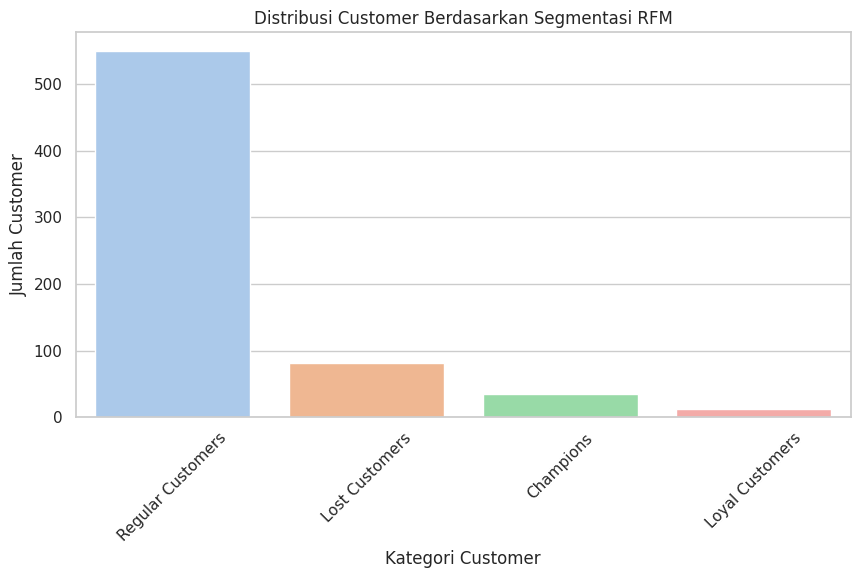

In [531]:
#Barplot Distribusi Customer
plt.figure(figsize=(10, 5))
sns.countplot(x=rfm_data["Customer_Segment"], order=rfm_data["Customer_Segment"].value_counts().index, palette="pastel")
plt.xticks(rotation=45)
plt.title("Distribusi Customer Berdasarkan Segmentasi RFM")
plt.xlabel("Kategori Customer")
plt.ylabel("Jumlah Customer")
plt.show()

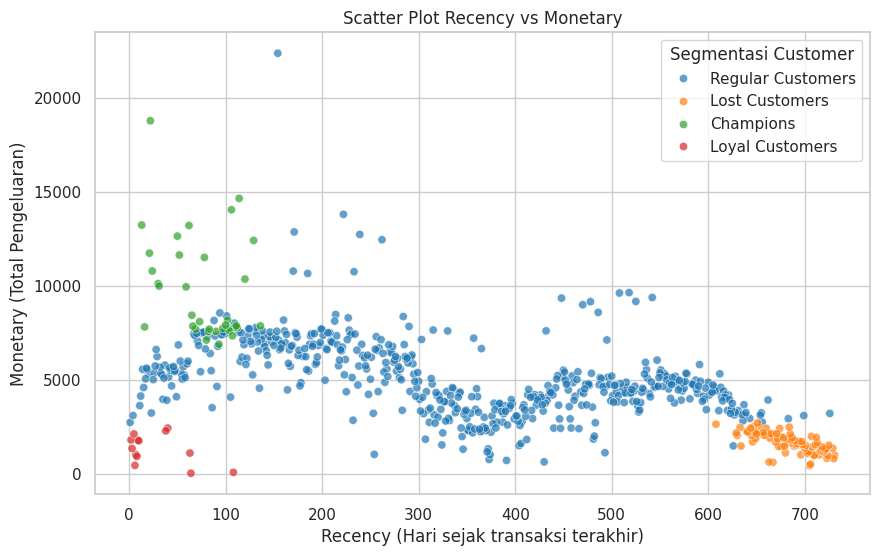

In [532]:
#Scatter Plot untuk Pola Customer
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_data, x="Recency", y="Monetary", hue="Customer_Segment", palette="tab10", alpha=0.7)
plt.title("Scatter Plot Recency vs Monetary")
plt.xlabel("Recency (Hari sejak transaksi terakhir)")
plt.ylabel("Monetary (Total Pengeluaran)")
plt.legend(title="Segmentasi Customer")
plt.show()

# Conclusion

- **Conclusion pertanyaan 1** : Distribusi jumlah peminjaman sepeda mengalami peningkatan pada jam-jam sibuk dan lebih banyak digunakan pada hari kerja, meskipun ada hari-hari tertentu dengan tingkat peminjaman lebih rendah.
- **Conclusion pertanyaan 2** : Musim sangat mempengaruhi pola peminjaman sepeda, dengan tingkat pemakaian yang lebih tinggi selama musim panas dan menurun drastis saat musim dingin.
- **Conclusion pertanyaan 3** : Pengguna registered lebih sering memanfaatkan sepeda untuk transportasi harian, sementara pengguna casual lebih banyak menggunakan sepeda untuk aktivitas santai di akhir pekan.